In [1]:
# Objective : Analyzing mushroom dataset using Support Vector Machine

In [2]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset

df = pd.read_csv('mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [4]:
df=df.rename(columns = {'Unnamed: 0':'ID'})

In [5]:
# Exploratory data analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [6]:
df.shape

(2000, 26)

In [7]:
df.head()

,ID,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [8]:
df.tail()

,ID,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199
1999,1073,convex,scaly,yellow,yes,pungent,descending,close,narrow,purple,...,partial,white,two,large,white,numerous,urban,poisonous,13.066414,21.056642


In [9]:
df.columns

Index(['ID', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [10]:
# Encoding categorical variables

# Identifying categorical columns

df_categorical_only = df.select_dtypes(include=np.object)
df_categorical_only

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\419416527.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_categorical_only = df.select_dtypes(include=np.object)


,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,gray,white,universal,white,none,none,yellow,clustered,urban,poisonous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,pink,orange,partial,orange,one,flaring,purple,abundant,leaves,poisonous
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,pink,orange,partial,white,one,zone,yellow,numerous,waste,poisonous
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,brown,red,partial,brown,two,evanescent,yellow,abundant,woods,poisonous
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,gray,pink,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous


In [11]:
from sklearn.preprocessing import LabelEncoder
cols = ['cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment',
       'gill_spacing','gill_size','gill_color','stalk_shape','stalk_color_above_ring',
       'stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type',
       'spore_print_color','population','habitat','class']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df

,ID,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,4,2,0,1,4,0,1,1,3,...,0,1,1,2,6,0,1,1,5.877891,17.464145
1996,1160,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,6.500840,13.501957
1997,265,2,1,3,1,3,3,0,1,7,...,0,0,2,1,8,0,6,1,13.558064,11.270020
1998,411,0,3,7,0,7,2,0,1,6,...,1,3,1,0,1,5,6,1,11.092703,8.423199


In [12]:
df.describe()

,ID,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,624.974000,2.052500,1.556000,3.862000,0.511500,3.988500,1.561500,1.00650,0.503500,5.348000,...,0.5050,1.455500,0.990500,3.562000,3.905500,2.458000,3.070000,0.700000,8.449118,12.314345
std,375.091938,1.435888,1.114668,2.626672,0.499993,2.542361,1.126433,0.81902,0.500113,3.388752,...,0.5001,1.117875,0.809776,2.294295,2.619351,1.732263,1.971559,0.458372,3.697217,7.048845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,290.000000,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,0.00000,0.000000,2.000000,...,0.0000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,5.291009,5.723521
50%,607.000000,2.000000,2.000000,4.000000,1.000000,4.000000,2.000000,1.00000,1.000000,5.000000,...,1.0000,2.000000,1.000000,4.000000,4.000000,2.000000,3.000000,1.000000,8.318596,12.124902
75%,957.250000,3.000000,3.000000,6.000000,1.000000,6.000000,3.000000,2.00000,1.000000,8.000000,...,1.0000,2.000000,2.000000,6.000000,6.000000,4.000000,5.000000,1.000000,11.781272,18.698605
max,1279.000000,4.000000,3.000000,8.000000,1.000000,8.000000,3.000000,2.00000,1.000000,11.000000,...,1.0000,3.000000,2.000000,7.000000,8.000000,5.000000,6.000000,1.000000,15.095066,25.000054


In [13]:
# Handling missing values

# No empty values in any column
df.isnull().sum()

ID                          0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\1439085101.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cap_shape'])


<Axes: xlabel='cap_shape', ylabel='Density'>

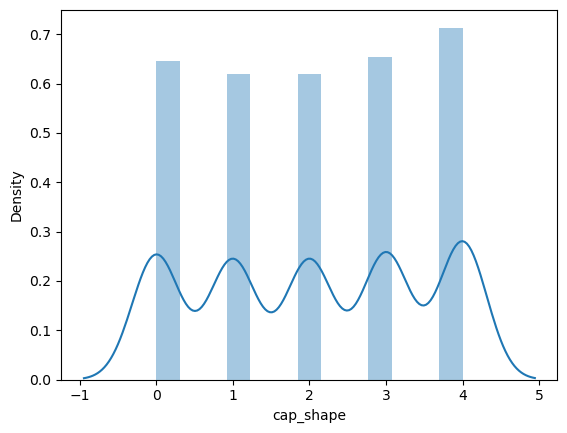

In [14]:
# Visualizations

sns.distplot(df['cap_shape'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\2949259169.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cap_surface'])


<Axes: xlabel='cap_surface', ylabel='Density'>

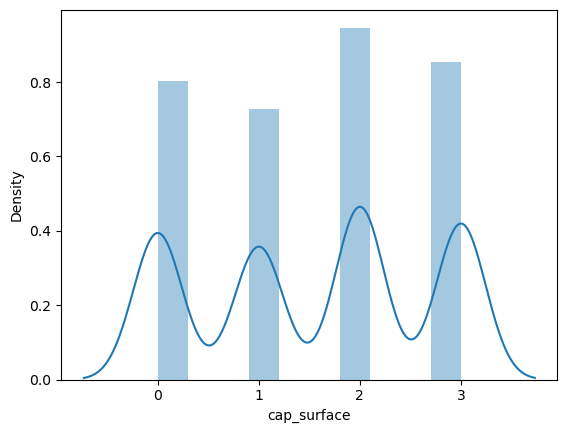

In [15]:
sns.distplot(df['cap_surface'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\46863768.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cap_color'])


<Axes: xlabel='cap_color', ylabel='Density'>

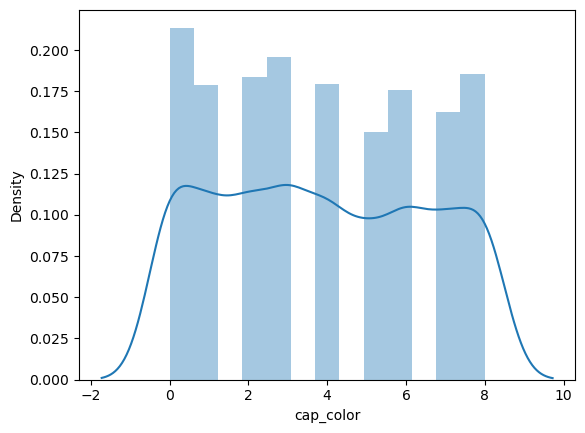

In [16]:
sns.distplot(df['cap_color'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\162840322.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bruises'])


<Axes: xlabel='bruises', ylabel='Density'>

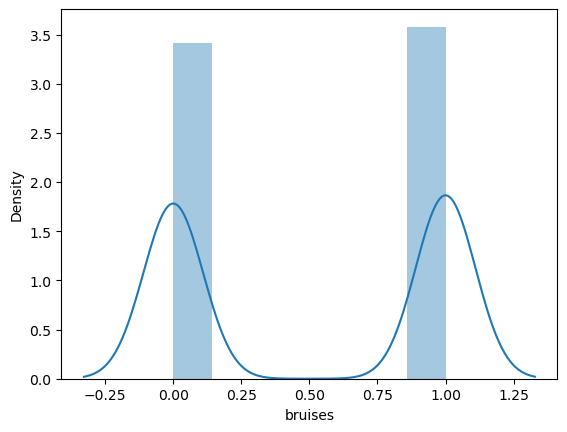

In [17]:
sns.distplot(df['bruises'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\4203924261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['odor'])


<Axes: xlabel='odor', ylabel='Density'>

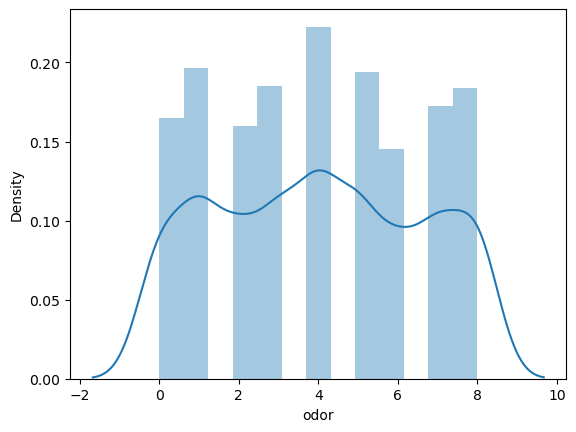

In [18]:
sns.distplot(df['odor'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\3771797643.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['gill_attachment'])


<Axes: xlabel='gill_attachment', ylabel='Density'>

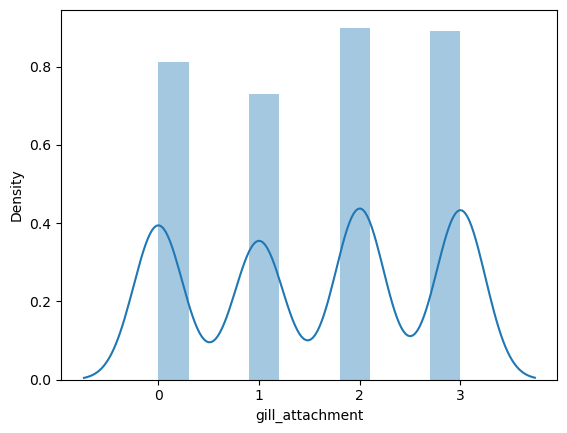

In [19]:
sns.distplot(df['gill_attachment'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\2416305557.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['gill_spacing'])


<Axes: xlabel='gill_spacing', ylabel='Density'>

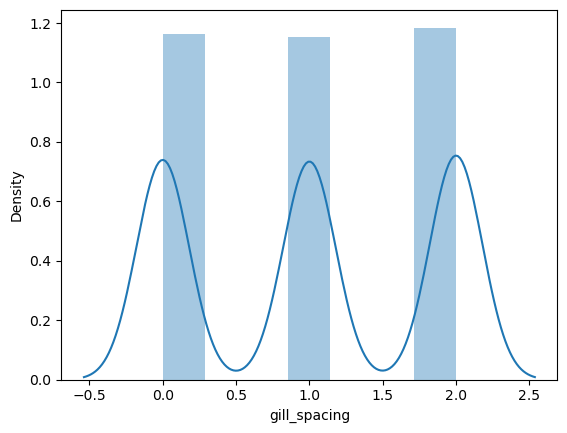

In [20]:
sns.distplot(df['gill_spacing'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\750891539.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['gill_size'])


<Axes: xlabel='gill_size', ylabel='Density'>

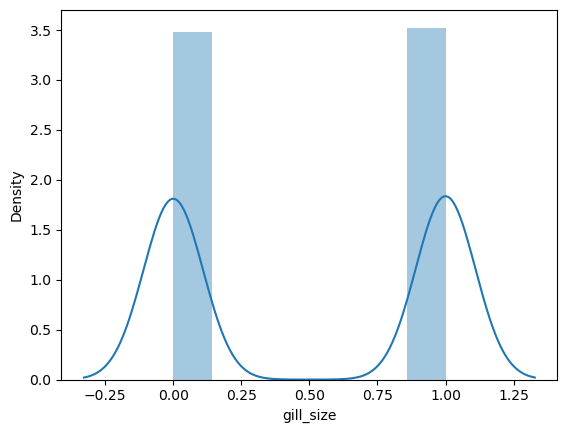

In [21]:
sns.distplot(df['gill_size'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\3165173134.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['gill_color'])


<Axes: xlabel='gill_color', ylabel='Density'>

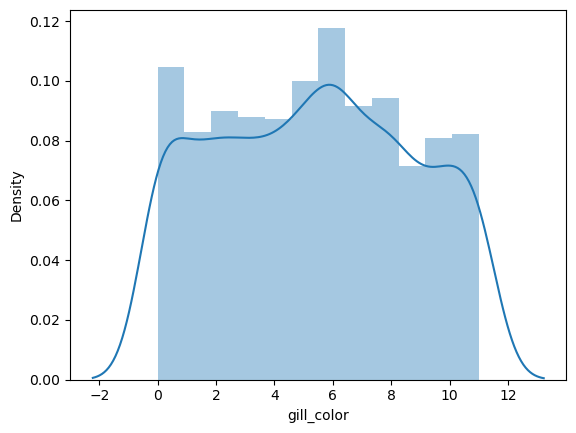

In [22]:
sns.distplot(df['gill_color'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\2241043720.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['stalk_shape'])


<Axes: xlabel='stalk_shape', ylabel='Density'>

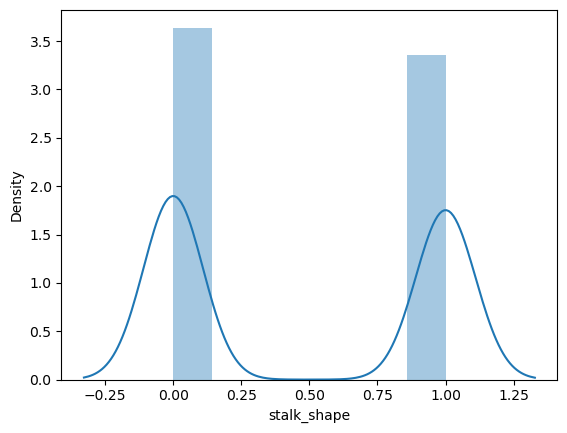

In [23]:
sns.distplot(df['stalk_shape'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\1234794588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['stalk_color_above_ring'])


<Axes: xlabel='stalk_color_above_ring', ylabel='Density'>

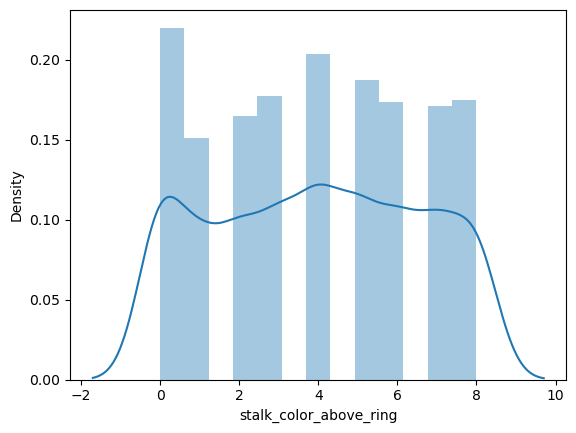

In [24]:
sns.distplot(df['stalk_color_above_ring'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\3454043047.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['stalk_color_below_ring'])


<Axes: xlabel='stalk_color_below_ring', ylabel='Density'>

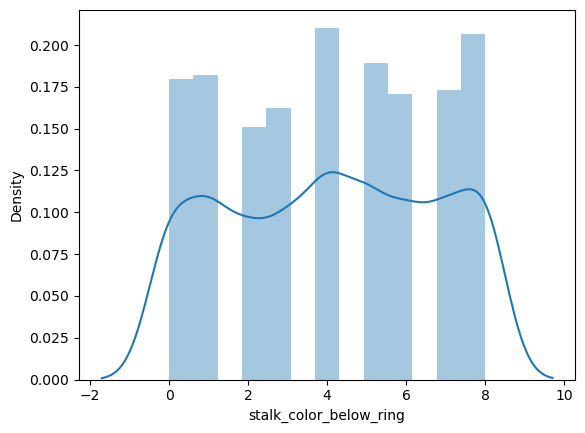

In [25]:
sns.distplot(df['stalk_color_below_ring'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\515119878.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['veil_type'])


<Axes: xlabel='veil_type', ylabel='Density'>

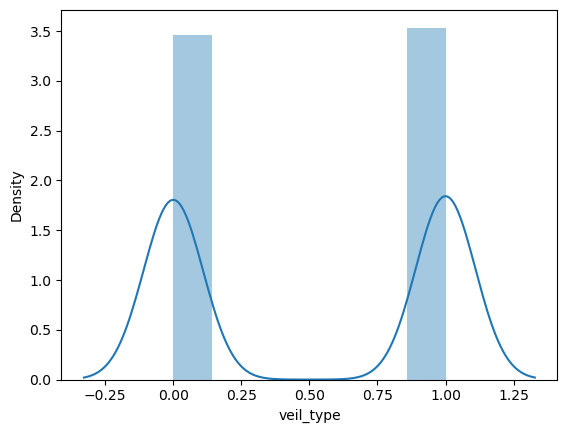

In [26]:
sns.distplot(df['veil_type'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\1245340545.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['veil_color'])


<Axes: xlabel='veil_color', ylabel='Density'>

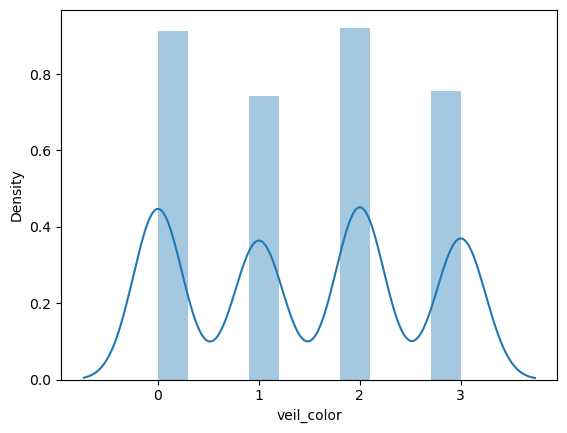

In [27]:
sns.distplot(df['veil_color'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\1149421609.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ring_number'])


<Axes: xlabel='ring_number', ylabel='Density'>

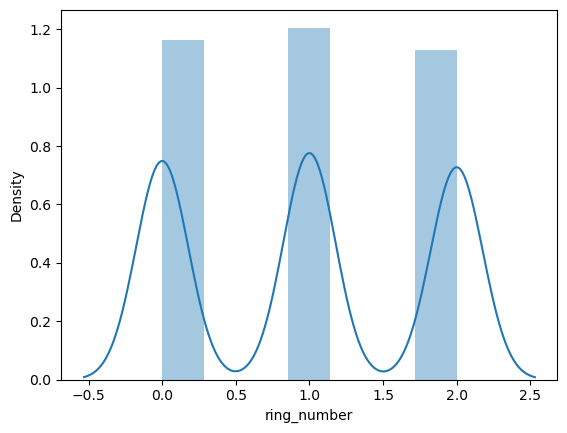

In [28]:
sns.distplot(df['ring_number'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\3690500745.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ring_type'])


<Axes: xlabel='ring_type', ylabel='Density'>

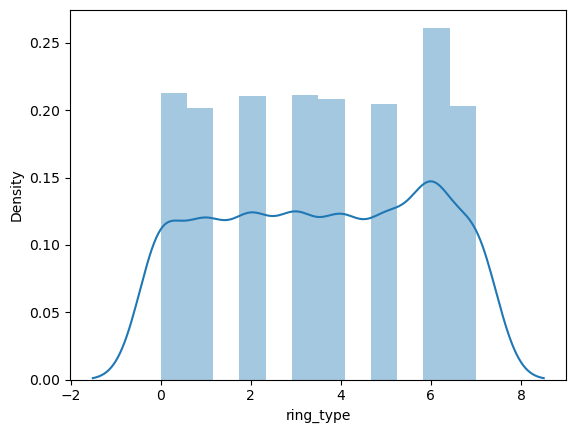

In [29]:
sns.distplot(df['ring_type'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\2612927965.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['spore_print_color'])


<Axes: xlabel='spore_print_color', ylabel='Density'>

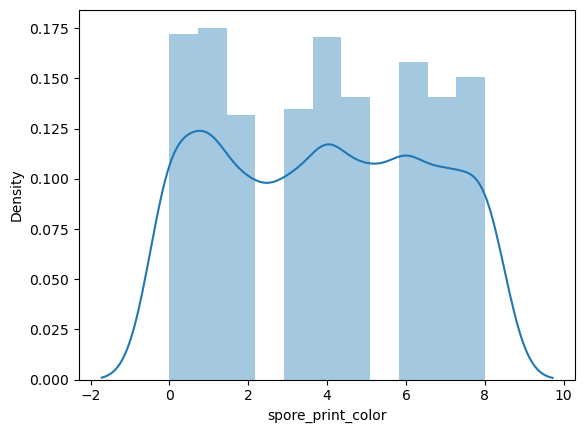

In [30]:
sns.distplot(df['spore_print_color'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\1114946792.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['population'])


<Axes: xlabel='population', ylabel='Density'>

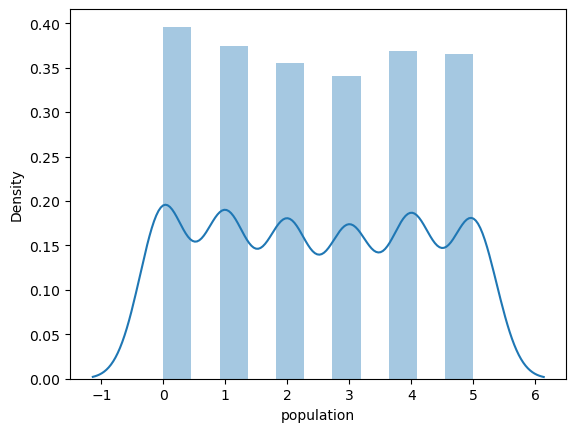

In [31]:
sns.distplot(df['population'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\2256546475.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['habitat'])


<Axes: xlabel='habitat', ylabel='Density'>

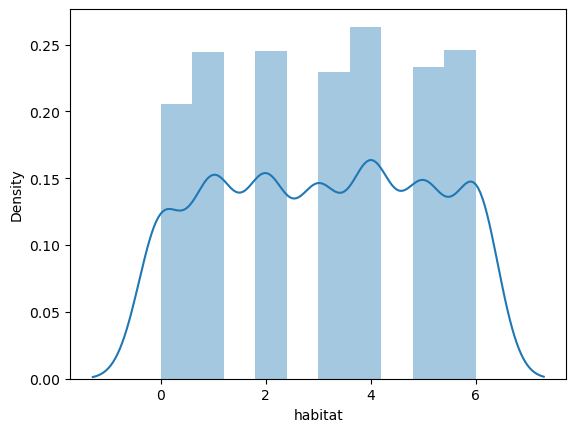

In [32]:
sns.distplot(df['habitat'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\729556929.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['class'])


<Axes: xlabel='class', ylabel='Density'>

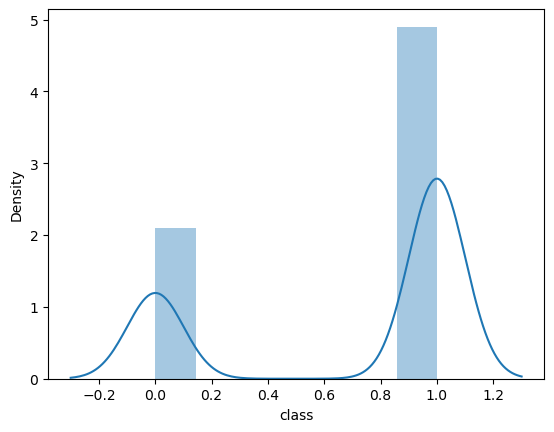

In [33]:
sns.distplot(df['class'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\1937229063.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['stalk_height'])


<Axes: xlabel='stalk_height', ylabel='Density'>

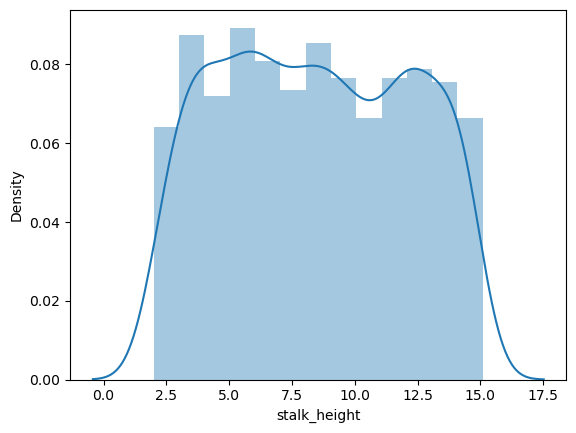

In [34]:
sns.distplot(df['stalk_height'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_16244\655755256.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cap_diameter'])


<Axes: xlabel='cap_diameter', ylabel='Density'>

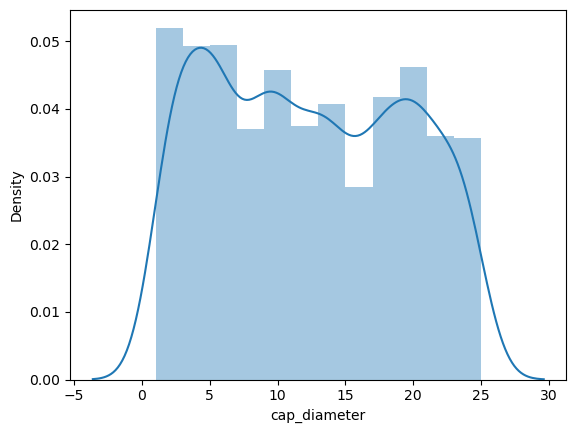

In [35]:
sns.distplot(df['cap_diameter'])

In [36]:
# Feature extraction

# Training data
X = df[['cap_shape','cap_color','bruises','gill_attachment','gill_spacing','veil_type','ring_type']]
X

,cap_shape,cap_color,bruises,gill_attachment,gill_spacing,veil_type,ring_type
0,4,7,0,1,2,0,6
1,4,6,0,3,1,1,6
2,3,5,1,1,1,1,6
3,0,4,1,3,0,0,0
4,3,8,1,2,1,1,4
...,...,...,...,...,...,...,...
1995,4,0,1,0,1,0,2
1996,4,5,1,0,2,0,7
1997,2,3,1,3,0,0,1
1998,0,7,0,2,0,1,0


In [37]:
# Testing data

y = df['class']
y

0       1
1       0
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: class, Length: 2000, dtype: int32

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

In [39]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1600, 7), (400, 7), (1600,), (400,))

In [40]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
# SVC - Support vector classifier
# SVM - Support vector machine

In [41]:
svm1 = svm.SVC(kernel='linear', C = 0.01)
svm1.fit(X_test,y_test)
SVC(C=0.01, kernel='linear')
y_train_pred = svm1.predict(X_train)
y_test_pred = svm1.predict(X_test)
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_test_pred)
accuracy_score(y_test,y_test_pred)
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred})
df

,Actual,Predicted
352,1,1
1588,1,1
1864,1,1
57,1,1
313,1,1
...,...,...
378,1,1
1730,1,1
1992,1,1
1526,1,1


In [43]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test,y_test_pred)
cm

array([[  0, 120],
       [  0, 280]], dtype=int64)

In [44]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



C:\Users\mihir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,1,1],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]}
grid=GridSearchCV(SVC(),param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 1, 1], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [46]:
print(grid.best_params_)
print(grid.score(X_test,y_test))

{'C': 1, 'degree': 6, 'kernel': 'poly'}
0.7125
